In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

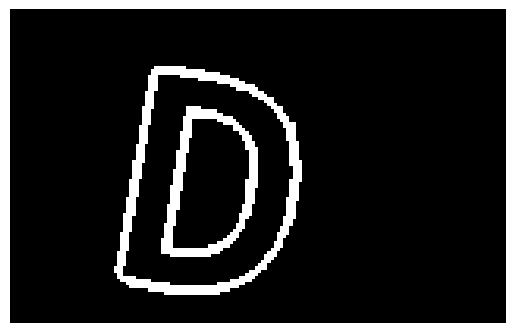

In [2]:
image = cv2.imread('/kaggle/input/ass2pasandhai/download/0_ODD.png')
processed_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(processed_image)
plt.axis('off')  # Optional: turn off axes
plt.show()

In [3]:
# Define the paths to image and label data
image_folder = '/kaggle/input/ass2pasandhai/download/'
label_file = '/kaggle/input/ass2pasandhai/labels.txt'

# Read the label file and extract image paths and labels
image_paths = []
labels = []
with open(label_file, 'r') as file:
    for index, line in enumerate(file):
        line = line.strip().split(',')
        image_paths.append(image_folder + str(index) + '_' + line[0]+'.png')  # Add index and '_' prefix to the image filename
        labels.append((line[0]))  # Assuming the label is in the second column


# Create a tf.data.Dataset from image and label data
image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
label_dataset = tf.data.Dataset.from_tensor_slices(labels)

label_dataset = label_dataset.map(lambda label: 0 if label == "ODD" else 1)


In [4]:
label_dataset_size = tf.data.experimental.cardinality(label_dataset).numpy()
print("Label Dataset Size:", label_dataset_size)

# Get the size of the image_dataset
image_dataset_size = tf.data.experimental.cardinality(image_dataset).numpy()
print("Image Dataset Size:", image_dataset_size)


Label Dataset Size: 2000
Image Dataset Size: 2000


Label Examples:
0
0
0
1
1
Image Examples:


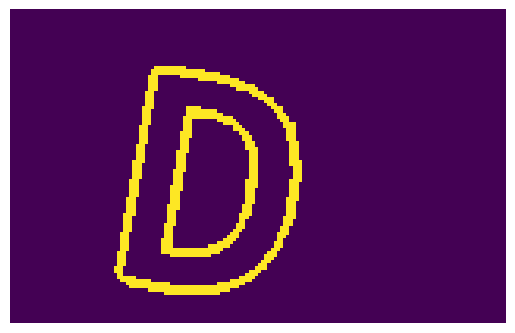

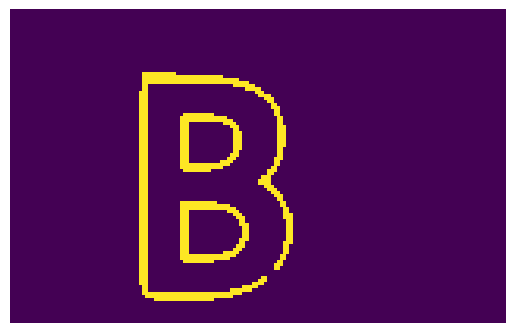

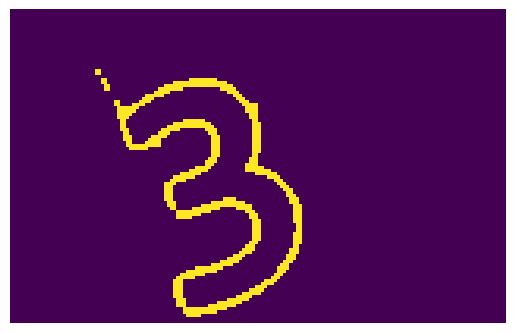

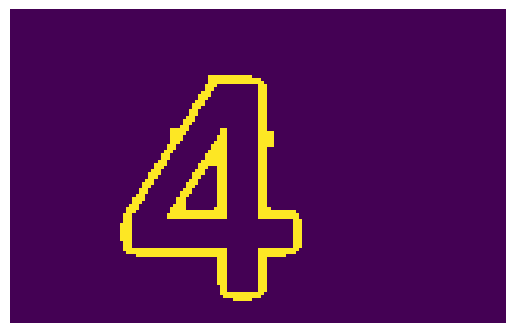

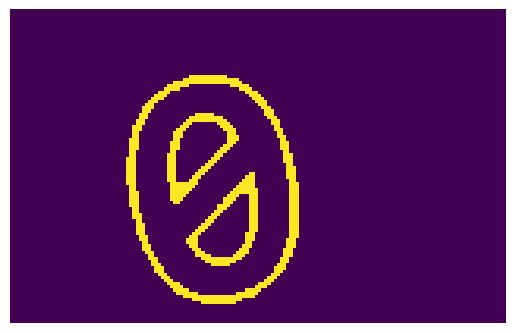

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

# Create the label_dataset and image_dataset

# Get some examples from the label_dataset
num_examples = 5
label_examples = label_dataset.take(num_examples)

# Iterate through the label examples
print("Label Examples:")
for label in label_examples:
    print(label.numpy())

# Get some examples from the image_dataset
image_examples = image_dataset.take(num_examples)

# Iterate through the image examples
print("Image Examples:")
for image in image_examples:
    # Load the image using PIL
    img = Image.open(image.numpy().decode("utf-8"))  # Decode and load the image

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Display the image
    plt.imshow(img_array)
    plt.axis('off')  # Optional: turn off axes
    plt.show()


In [6]:
dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

In [7]:
train_ratio = 0.9
val_ratio = 0.1

# Get the total number of samples
num_samples = len(image_paths)

# Calculate the number of samples for train and validation sets
num_train_samples = int(train_ratio * num_samples)
num_val_samples = int(val_ratio * num_samples)

train_dataset = dataset.take(num_train_samples)
val_dataset = dataset.skip(num_train_samples)

# Print the number of samples in each dataset
print("Number of samples in train dataset:", tf.data.experimental.cardinality(train_dataset).numpy())
print("Number of samples in validation dataset:", tf.data.experimental.cardinality(val_dataset).numpy())

Number of samples in train dataset: 1800
Number of samples in validation dataset: 200


In [8]:
# Access labels and images in the train dataset
train_labels = train_dataset.map(lambda image, label: label)
train_images = train_dataset.map(lambda image, label: image)

# Access labels and images in the validation dataset
val_labels = val_dataset.map(lambda image, label: label)
val_images = val_dataset.map(lambda image, label: image)

In [9]:
def get_image_size(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image)
    return tf.shape(image)[:2]  # Return the height and width of the image

# Get the size of each image in the train dataset
image_sizes = train_images.map(get_image_size)

# Print the size of each image
for size in image_sizes:
    print("Image size:", size.numpy())


Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size: [100 158]
Image size

In [10]:
# Define a function to preprocess the images and convert to tensors
def preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, (100, 158))
    image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
    image = tf.cast(image, tf.float32) / 255.0
    #label = tf.one_hot(label, depth=2)  # Convert labels to one-hot encoded vectors
    return image, label


# Apply preprocessing and convert the dataset to tensors
train_dataset = train_dataset.map(preprocess_image)

# Shuffle and batch the dataset
batch_size = 128
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size)

# Adjust the input shape of the model
input_shape = (100, 158, 1)

# Create the model with the adjusted input shape


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=input_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Change the loss function to binary cross-entropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

# Train the model
#model.fit(train_dataset, epochs=100)

Epoch 1/100
15/15 [==============================] - 8s 422ms/step - loss: 0.7096 - accuracy: 0.8128 - precision: 0.8037 - recall: 0.8209 - auc: 0.8708
Epoch 2/100
15/15 [==============================] - 7s 422ms/step - loss: 0.0277 - accuracy: 0.9944 - precision: 0.9944 - recall: 0.9944 - auc: 0.9998
Epoch 3/100
15/15 [==============================] - 6s 395ms/step - loss: 0.0041 - accuracy: 0.9994 - precision: 1.0000 - recall: 0.9989 - auc: 1.0000
Epoch 4/100
15/15 [==============================] - 6s 398ms/step - loss: 0.0020 - accuracy: 0.9989 - precision: 0.9989 - recall: 0.9989 - auc: 1.0000
Epoch 5/100
15/15 [==============================] - 6s 396ms/step - loss: 9.6387e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000
Epoch 6/100
15/15 [==============================] - 6s 395ms/step - loss: 6.8093e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000
Epoch 7/100
15/15 [==============================] - 6s 397ms/step - loss: 4.126

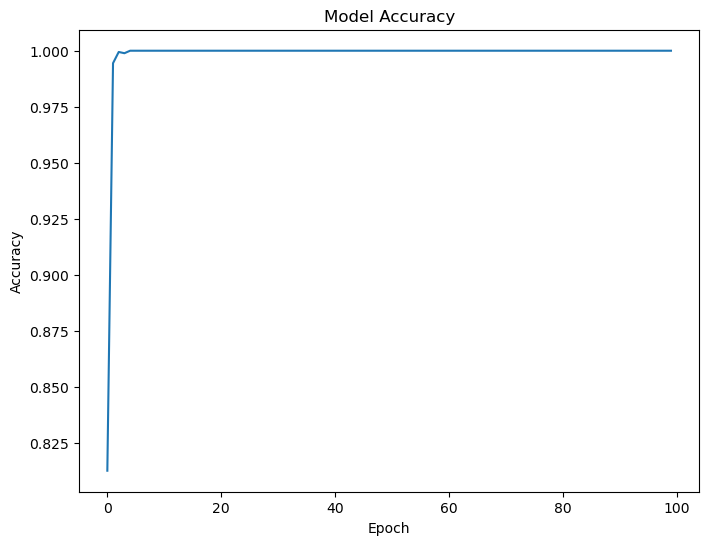

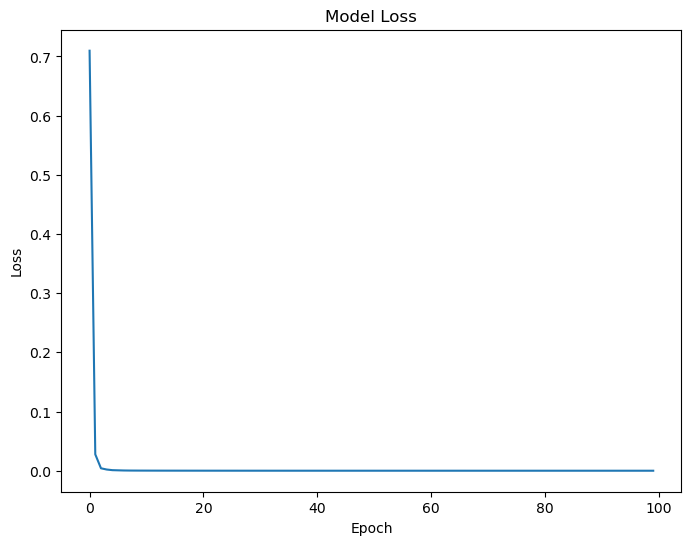

In [12]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(train_dataset, epochs=100)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

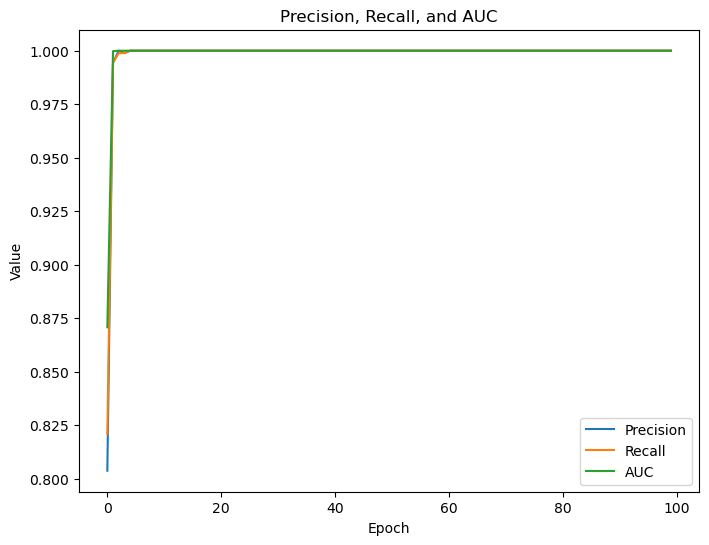

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.plot(history.history['auc'])
plt.title('Precision, Recall, and AUC')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(['Precision', 'Recall', 'AUC'])
plt.show()

In [39]:
# Save the weights
model.save_weights('model_weights_slp.h5')

In [14]:
# def preprocess_image(image_path, label):
#     image = tf.io.read_file(image_path)
#     image = tf.image.decode_png(image, channels=3)
#     image = tf.image.resize(image, (100, 158))
#     image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
#     image = tf.cast(image, tf.float32) / 255.0
#     return image, label

def preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, (100, 158))
    image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
    image = tf.cast(image, tf.float32) / 255.0
    #label = tf.one_hot(label, depth=2)  # Convert labels to one-hot encoded vectors
    return image, label



# Apply preprocessing and convert the dataset to tensors
val_dataset = val_dataset.map(preprocess_image)

# Shuffle and batch the dataset
batch_size = 128
val_dataset = val_dataset.shuffle(buffer_size=1000).batch(batch_size)

# Adjust the input shape of the model
input_shape = (100, 158, 1)


In [15]:
#validation_dataset = validation_dataset.map(preprocess_image).batch(batch_size)

# Evaluate the model on the validation dataset
#result = model.evaluate(validation_dataset)
#test_acc = model.evaluate(val_dataset, verbose=2)


import time

# Evaluate the model on the validation dataset
start_time = time.time()
test_accuracy = model.evaluate(val_dataset, verbose=2)
end_time = time.time()

#print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Inference Time:", end_time - start_time, "seconds")

2/2 - 1s - loss: 2.5191e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - 732ms/epoch - 366ms/step
Test Accuracy: [2.5190995074808598e-05, 1.0, 1.0, 1.0, 1.0]
Inference Time: 0.7385334968566895 seconds


In [18]:
import matplotlib.pyplot as plt

# Get some examples from the validation dataset
num_examples = 5
validation_examples = val_dataset.take(num_examples)

# Iterate through the validation examples
print("Validation Examples:")
for image, label in validation_examples:
    # Convert the image tensor to a numpy array
    img_array = image.numpy()

    # Check the shape of the image array
    if len(img_array.shape) == 3:  # RGB image (height, width, channels)
        plt.imshow(img_array)
    elif len(img_array.shape) == 2:  # Grayscale image (height, width)
        plt.imshow(img_array, cmap='gray')
    else:
        print(f"Unsupported image shape: {img_array.shape}")
        continue

    plt.title("Label: {}".format(label.numpy()))
    plt.axis('off')  # Optional: turn off axes
    plt.show()


Validation Examples:
Unsupported image shape: (128, 100, 158, 1)
Unsupported image shape: (72, 100, 158, 1)


In [19]:
# Save the model
model.save("model.h5")